# 0- imports

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import random

# 1- generate random network 
##    1-1- with poisson distribution

### 1-1-1- initial varibles

In [2]:
class RandomNetworkPoisson:
    def __init__(self, numberOfNode):
        self.numberOfNode = numberOfNode
        self.wpr=[0]*self.numberOfNode
        self.data = [[0]*self.numberOfNode for _ in range(self.numberOfNode)]
        self.inComing=np.random.poisson(1, size=self.numberOfNode)
        self.currentQueue = [0]*self.numberOfNode
        self.totalQueue = [100]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            if(self.inComing[i]==0):
                self.inComing[i]=1
        for i in range (0, self.numberOfNode):
            my_list = np.arange(0,self.numberOfNode).tolist()
            my_list.remove(i)                        
            random.shuffle(my_list)
            my_list2=my_list[0:self.inComing[i]+1]
            for f in range(0,self.numberOfNode):
                if f in my_list2:
                    self.data[i][f]=1
        self.outComing=[0]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            for j in range (0, self.numberOfNode):
                if self.data[i][j]==1:
                    self.outComing[i]=self.outComing[i]+1

### 1-1-2- generate

In [3]:
ER1 = RandomNetworkPoisson(100)
ER2 = RandomNetworkPoisson(100)

### 1-1-3- plotting degree Frequency

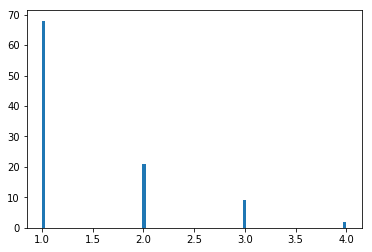

In [4]:
plt.hist(ER1.inComing, 100)
plt.show()

##    1-2- with Exponential distribution

### 1-2-1- initial varibles

In [5]:
class RandomNetworkExponential:
    def __init__(self, numberOfNode):
        self.numberOfNode = numberOfNode
        self.data = [[0]*self.numberOfNode for _ in range(self.numberOfNode)]
        self.inComing=np.random.exponential(1, size=self.numberOfNode)
        self.currentQueue = [0]*self.numberOfNode
        self.totalQueue = [100]*self.numberOfNode
        self.wpr=[0]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            my_list = np.arange(0,self.numberOfNode).tolist()
            my_list.remove(i)                        
            random.shuffle(my_list)
            my_list2=my_list[0:self.inComing[i]]
            for f in range(0,self.numberOfNode):
                if f in my_list2:
                    self.data[i][f]=1
        self.outComing=[0]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            for j in range (0, self.numberOfNode):
                if self.data[i][j]==1:
                    self.outComing[i]=self.outComing[i]+1

### 1-2-2- generate

In [6]:
# ER3 = RandomNetworkExponential(2500)
# ER4 = RandomNetworkExponential(2500)

### 1-2-3- plotting degree Frequency

In [7]:
# plt.hist(ER3.inComing, 200)
# plt.show()

# 2- generate scale free network

## 2-1- initial varibles

In [8]:
class ScaleFreeNetwork:
    def __init__(self, numberOfNode):
        self.numberOfNode = numberOfNode
        self.data = [[0]*self.numberOfNode for _ in range(self.numberOfNode)]
        self.inComing = [0]*self.numberOfNode
        self.currentQueue = [0]*self.numberOfNode
        self.totalQueue = [100]*self.numberOfNode
        self.wpr=[0]*self.numberOfNode
        my_list_scale = np.arange(0,self.numberOfNode).tolist()    
        random.shuffle(my_list_scale)
        for i in range (0, len(my_list_scale)):
            self.inComing[my_list_scale[i]]=11-int(math.log(i+1,2))
            if i>=2047:
                self.inComing[my_list_scale[i]]=1
        for i in range (0, self.numberOfNode):
            my_list = np.arange(0,self.numberOfNode).tolist()
            my_list.remove(i)                        
            random.shuffle(my_list)
            my_list2=my_list[0:self.inComing[i]]
            for f in range(0,self.numberOfNode):
                if f in my_list2:
                    self.data[i][f]=1
        self.outComing=[0]*self.numberOfNode
        for i in range (0, self.numberOfNode):
            for j in range (0, self.numberOfNode):
                if self.data[i][j]==1:
                    self.outComing[i]=self.outComing[i]+1

### 2-2- generate

In [9]:
SF1 = ScaleFreeNetwork(500)
SF2 = ScaleFreeNetwork(500)

## 2-3- plotting degree Frequency

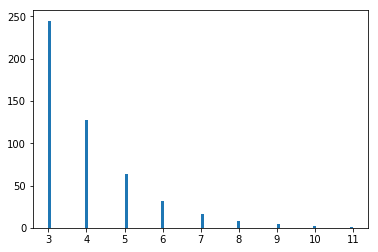

In [10]:
plt.hist(SF1.inComing, 100)
plt.show()

# 3- mixing networks for making interdent network

## 3-1- define params

In [11]:
couplingStrength=1.0

## 3-2- generate

In [12]:
class InterdependentNetwork:
    def __init__(self,networkA,networkB,couplingStrength):
        self.couplingStrength = couplingStrength
        self.networkA = networkA
        self.networkB = networkB
        self.neighborA = np.arange(0,self.networkA.numberOfNode).tolist()              
        random.shuffle(self.neighborA)
        self.neighborB = np.arange(0,self.networkB.numberOfNode).tolist()              
        random.shuffle(self.neighborB)
        self.numberOfneighbor=int(self.couplingStrength*self.networkB.numberOfNode)
        self.neighborA=self.neighborA[0:self.numberOfneighbor]
        self.neighborB=self.neighborB[0:self.numberOfneighbor]

In [13]:
ER_ER_Network=InterdependentNetwork(SF1,SF2,couplingStrength)

# 4- starting algorithm

## 4-1- define params

In [14]:
R=[1,5,10,50]
numberOfdays=20

In [15]:
def sizeOfG(ER_ER_Network,failsNodesA,failsNodesB):
    visitedA = [0]*ER_ER_Network.networkA.numberOfNode
    visitedB = [0]*ER_ER_Network.networkB.numberOfNode
    
    stackOfDfsIndex=[]
    stackOfDfsType=[]
    SizeOfMaxComponent=0;
    while 0 in visitedA or 0 in visitedB:
        SizeOfCurrentComponent=0;
        if 0 in visitedA:
            stackOfDfsIndex.append(visitedA.index(0)) 
            stackOfDfsType.append('A')
        else:
            stackOfDfsIndex.append(visitedB.index(0)) 
            stackOfDfsType.append('B') 
        while len(stackOfDfsIndex)>0:
            currentNode=stackOfDfsIndex.pop()
            currentType=stackOfDfsType.pop()
            if currentType=='A' and (visitedA[currentNode]==1 or currentNode in failsNodesA):
                visitedA[currentNode]=1
                continue
            if currentType=='B' and (visitedB[currentNode]==1 or currentNode in failsNodesB):
                visitedB[currentNode]=1
                continue
            SizeOfCurrentComponent += 1
            if SizeOfCurrentComponent > SizeOfMaxComponent:
                SizeOfMaxComponent = SizeOfCurrentComponent
                
            if currentType=='A':
                visitedA[currentNode]=1
                indices = [i for i, x in enumerate(ER_ER_Network.networkA.data[currentNode]) if x == 1]
                stackOfDfsIndex.extend(indices)
                stackOfDfsType.extend(['A']*len(indices))
                if currentNode in ER_ER_Network.neighborA:
                    stackOfDfsIndex.append(ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(currentNode)])
                    stackOfDfsType.append('B')
            if currentType=='B':
                visitedB[currentNode]=1
                indices = [i for i, x in enumerate(ER_ER_Network.networkB.data[currentNode]) if x == 1]
                stackOfDfsIndex.extend(indices)
                stackOfDfsType.extend(['B']*len(indices))
                if currentNode in ER_ER_Network.neighborB:
                    stackOfDfsIndex.append(ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(currentNode)])
                    stackOfDfsType.append('A')
    return SizeOfMaxComponent/(ER_ER_Network.networkB.numberOfNode + ER_ER_Network.networkA.numberOfNode)

In [16]:
def distrubuteQueue(network,nodeIndex):
    indices = [i for i, x in enumerate(network.data[nodeIndex]) if x == 1]
    for i in range(0,len(indices)):
        network.currentQueue[indices[i]] += network.currentQueue[nodeIndex]/len(indices)

In [17]:
def findingCentrality(network,numberOfCentrality,failsNodesA,failsNodeB):
    numberOfOut=[]
    for nodeIndex in range(0,network.networkA.numberOfNode):
        if nodeIndex in failsNodesA:
            numberOfOut.append(0)
        else:
            numberOfOut.append(len([i for i, x in enumerate(network.networkA.data[nodeIndex]) if x == 1]))
    for nodeIndex in range(0,network.networkB.numberOfNode):
        if nodeIndex in failsNodesB:
            numberOfOut.append(0)
        else:
            numberOfOut.append(len([i for i, x in enumerate(network.networkB.data[nodeIndex]) if x == 1]))
    sortedNumberOfOut=list(np.argsort(numberOfOut))
    sortedNumberOfOut.reverse()
    return sortedNumberOfOut[0:numberOfCentrality]

In [18]:
def startCascadingFailure(network,R,failsNodesA,failsNodesB):
    print('start of cascading {}  {}'.format(len(failsNodesA),len(failsNodesB)))
    listOfCentalityNode=findingCentrality(network,R,failsNodesA,failsNodesB)
    for i in range(0,len(listOfCentalityNode)):
        if listOfCentalityNode[i] < network.networkA.numberOfNode:
            network.networkA.currentQueue[i]=0
            failsNodesA=list(filter(lambda a: a != i, failsNodesA))
        else:
            network.networkB.currentQueue[i-network.networkA.numberOfNode]=0
            failsNodesB=list(filter(lambda a: a != i-network.networkA.numberOfNode, failsNodesB))
    print('end of cascading {}  {}'.format(len(failsNodesA),len(failsNodesB)))
    return [failsNodesA,failsNodesB]

## 4-2- define centrality like zhong et al.

In [19]:
sizeOfGInEachDay=[[0]*numberOfdays for _ in range(len(R))]

for rIndex in range(0, len(R)):
    failsNodesA=[]
    failsNodesB=[]
    ER_ER_Network.networkA.currentQueue=[0]*ER_ER_Network.networkA.numberOfNode
    ER_ER_Network.networkB.currentQueue=[0]*ER_ER_Network.networkB.numberOfNode
    
    centrallist=findingCentrality(ER_ER_Network,50,failsNodesA,failsNodesB)
    for i in range(0,50):
        if centrallist[i] < ER_ER_Network.networkA.numberOfNode:
            ER_ER_Network.networkA.currentQueue[centrallist[i]]+=ER_ER_Network.networkA.totalQueue[centrallist[i]]*4+1
        else:
            ER_ER_Network.networkB.currentQueue[centrallist[i]-ER_ER_Network.networkA.numberOfNode]+=ER_ER_Network.networkB.totalQueue[centrallist[i]-ER_ER_Network.networkA.numberOfNode]*4+1

    for dayIndex in range (1, numberOfdays):
        print('\n{} day of: {}'.format(R[rIndex],dayIndex))
        if(len(failsNodesA)+len(failsNodesB)>(ER_ER_Network.networkA.numberOfNode+ER_ER_Network.networkA.numberOfNode)*0.3):
            fails=startCascadingFailure(ER_ER_Network,R[rIndex],failsNodesA,failsNodesB)
            failsNodesA=fails[0]
            failsNodesB=fails[1]
        print('length of fails {}  {}'.format(len(failsNodesA),len(failsNodesB)))
        sizeOfGInEachDay[rIndex][dayIndex] = sizeOfG(ER_ER_Network,failsNodesA,failsNodesB)
        for nodeIndex in range (0, ER_ER_Network.networkA.numberOfNode): 
            ER_ER_Network.networkA.currentQueue[nodeIndex]+=np.random.poisson(100, 1)[0]
            if ER_ER_Network.networkA.currentQueue[nodeIndex]<100:
                ER_ER_Network.networkA.currentQueue[nodeIndex]=0
                failsNodesA=list(filter(lambda a: a != nodeIndex, failsNodesA))
            else:
                ER_ER_Network.networkA.currentQueue[nodeIndex]-=100
                if nodeIndex not in failsNodesA:
                    failsNodesA.append(nodeIndex)
                    distrubuteQueue(ER_ER_Network.networkA,nodeIndex)
                    if nodeIndex in ER_ER_Network.neighborA:
                        failsNodesB.append(ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(nodeIndex)])
                        distrubuteQueue(ER_ER_Network.networkB,ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(nodeIndex)])


        for nodeIndex in range (0, ER_ER_Network.networkB.numberOfNode): 
            ER_ER_Network.networkB.currentQueue[nodeIndex]+=np.random.poisson(70, 1)[0]
            if ER_ER_Network.networkB.currentQueue[nodeIndex]<100:
                ER_ER_Network.networkB.currentQueue[nodeIndex]=0
                failsNodesB=list(filter(lambda a: a != nodeIndex, failsNodesB))
            else:
                ER_ER_Network.networkB.currentQueue[nodeIndex]-=100
                if nodeIndex not in failsNodesB:
                    failsNodesB.append(nodeIndex)
                    distrubuteQueue(ER_ER_Network.networkB,nodeIndex)
                    if nodeIndex in ER_ER_Network.neighborB:
                        failsNodesA.append(ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(nodeIndex)])
                        distrubuteQueue(ER_ER_Network.networkA,ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(nodeIndex)])



1 day of: 1
length of fails 0  0

1 day of: 2
start of cascading 423  185
end of cascading 423  185
length of fails 423  185

1 day of: 3
start of cascading 494  120
end of cascading 494  120
length of fails 494  120

1 day of: 4
start of cascading 491  56
end of cascading 491  56
length of fails 491  56

1 day of: 5
start of cascading 497  42
end of cascading 497  42
length of fails 497  42

1 day of: 6
start of cascading 494  25
end of cascading 494  25
length of fails 494  25

1 day of: 7
start of cascading 504  33
end of cascading 504  33
length of fails 504  33

1 day of: 8
start of cascading 503  27
end of cascading 503  27
length of fails 503  27

1 day of: 9
start of cascading 507  25
end of cascading 507  25
length of fails 507  25

1 day of: 10
start of cascading 507  25
end of cascading 507  25
length of fails 507  25

1 day of: 11
start of cascading 501  27
end of cascading 501  27
length of fails 501  27

1 day of: 12
start of cascading 495  26
end of cascading 495  26
le

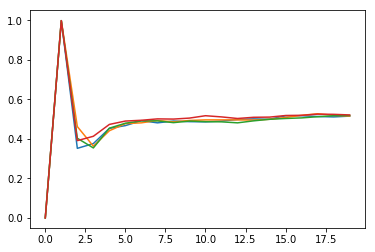

In [20]:
plt.ylim(top=1.05)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=-0.05)
for rIndex in range(0, len(R)):
    plt.plot(sizeOfGInEachDay[rIndex]) # plotting by columns
plt.show()

## 4-3- define centrality like shahpari et al.

### 4-3-1- algorithm

In [21]:
d=0.85
wpr=[1] *ER_ER_Network.networkA.numberOfNode
wOut=[[0]*ER_ER_Network.networkA.numberOfNode for _ in range(ER_ER_Network.networkA.numberOfNode)]
wIn=[[0]*ER_ER_Network.networkA.numberOfNode for _ in range(ER_ER_Network.networkA.numberOfNode)]
for j in range (0, ER_ER_Network.networkA.numberOfNode):
    print(j)
    for i in range (0, ER_ER_Network.networkA.numberOfNode):
        sumOfIncoming=0
        sumOfOutcoming=0
        indicesOutcome = [p for p, x in enumerate(ER_ER_Network.networkA.data[j]) if x == 1]
        for k in range(0,len(indicesOutcome)):
            sumOfIncoming+=ER_ER_Network.networkA.inComing[indicesOutcome[k]]
            sumOfOutcoming=sumOfOutcoming+ER_ER_Network.networkA.outComing[indicesOutcome[k]]
        wIn[j][i]=ER_ER_Network.networkA.inComing[i]/max(sumOfIncoming,1)
        wOut[j][i]=ER_ER_Network.networkA.outComing[i]/max(sumOfOutcoming,1)  

for i in range (0, ER_ER_Network.networkA.numberOfNode):
    sumOfwprs=0
    for j in range (0, ER_ER_Network.networkA.numberOfNode):
        if ER_ER_Network.networkA.data[j][i]==1:
            sumOfwprs=sumOfwprs+wpr[j]*wIn[j][i]*wOut[j][i]
    ER_ER_Network.networkA.wpr[i]=(1-d)+d*(sumOfwprs)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
d=0.85
wpr=[1] *ER_ER_Network.networkB.numberOfNode
wOut=[[0]*ER_ER_Network.networkB.numberOfNode for _ in range(ER_ER_Network.networkB.numberOfNode)]
wIn=[[0]*ER_ER_Network.networkB.numberOfNode for _ in range(ER_ER_Network.networkB.numberOfNode)]
for j in range (0, ER_ER_Network.networkB.numberOfNode):
    print(j)
    for i in range (0, ER_ER_Network.networkB.numberOfNode):
        sumOfIncoming=0
        sumOfOutcoming=0
        indicesOutcome = [p for p, x in enumerate(ER_ER_Network.networkB.data[j]) if x == 1]
        for k in range(0,len(indicesOutcome)):
            sumOfIncoming+=ER_ER_Network.networkB.inComing[indicesOutcome[k]]
            sumOfOutcoming=sumOfOutcoming+ER_ER_Network.networkB.outComing[indicesOutcome[k]]
        wIn[j][i]=ER_ER_Network.networkB.inComing[i]/max(sumOfIncoming,1)
        wOut[j][i]=ER_ER_Network.networkB.outComing[i]/max(sumOfOutcoming,1)  

for i in range (0, ER_ER_Network.networkB.numberOfNode):
    sumOfwprs=0
    for j in range (0, ER_ER_Network.networkB.numberOfNode):
        if ER_ER_Network.networkB.data[j][i]==1:
            sumOfwprs=sumOfwprs+wpr[j]*wIn[j][i]*wOut[j][i]
    ER_ER_Network.networkB.wpr[i]=(1-d)+d*(sumOfwprs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### 4-3-2- finding centrality

In [23]:
def findingCentralityShahpari(network,numberOfCentrality,failsNodesA,failsNodeB):
    wprA=network.networkA.wpr
    wprB=network.networkB.wpr
    for i in range(0,len(wprA)):
        if i in failsNodesA:
            wprA[i]=-2
        if i in failsNodesB:
            wprB[i]=-2
    sortedwprA=list(np.argsort(wprA))
    sortedwprA.reverse()
    return sortedwprA[0:numberOfCentrality]

In [24]:
sizeOfGInEachDay=[[0]*numberOfdays for _ in range(len(R))]

for rIndex in range(0, len(R)):
    failsNodesA=[]
    failsNodesB=[]
    ER_ER_Network.networkA.currentQueue=[0]*ER_ER_Network.networkA.numberOfNode
    ER_ER_Network.networkB.currentQueue=[0]*ER_ER_Network.networkB.numberOfNode
    
    centrallist=findingCentralityShahpari(ER_ER_Network,50,failsNodesA,failsNodesB)
    for i in range(0,50):
        if centrallist[i] < ER_ER_Network.networkA.numberOfNode:
            ER_ER_Network.networkA.currentQueue[centrallist[i]]+=ER_ER_Network.networkA.totalQueue[centrallist[i]]*4+1
        else:
            ER_ER_Network.networkB.currentQueue[centrallist[i]-ER_ER_Network.networkA.numberOfNode]+=ER_ER_Network.networkB.totalQueue[centrallist[i]-ER_ER_Network.networkA.numberOfNode]*4+1

    for dayIndex in range (1, numberOfdays):
        print('\n{} day of: {}'.format(R[rIndex],dayIndex))
        if(len(failsNodesA)+len(failsNodesB)>(ER_ER_Network.networkA.numberOfNode+ER_ER_Network.networkA.numberOfNode)*0.3):
            fails=startCascadingFailure(ER_ER_Network,R[rIndex],failsNodesA,failsNodesB)
            failsNodesA=fails[0]
            failsNodesB=fails[1]
        print('length of fails {}  {}'.format(len(failsNodesA),len(failsNodesB)))
        sizeOfGInEachDay[rIndex][dayIndex] = sizeOfG(ER_ER_Network,failsNodesA,failsNodesB)
        for nodeIndex in range (0, ER_ER_Network.networkA.numberOfNode): 
            ER_ER_Network.networkA.currentQueue[nodeIndex]+=np.random.poisson(100, 1)[0]
            if ER_ER_Network.networkA.currentQueue[nodeIndex]<100:
                ER_ER_Network.networkA.currentQueue[nodeIndex]=0
                failsNodesA=list(filter(lambda a: a != nodeIndex, failsNodesA))
            else:
                ER_ER_Network.networkA.currentQueue[nodeIndex]-=100
                if nodeIndex not in failsNodesA:
                    failsNodesA.append(nodeIndex)
                    distrubuteQueue(ER_ER_Network.networkA,nodeIndex)
                    if nodeIndex in ER_ER_Network.neighborA:
                        failsNodesB.append(ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(nodeIndex)])
                        distrubuteQueue(ER_ER_Network.networkB,ER_ER_Network.neighborB[ER_ER_Network.neighborA.index(nodeIndex)])


        for nodeIndex in range (0, ER_ER_Network.networkB.numberOfNode): 
            ER_ER_Network.networkB.currentQueue[nodeIndex]+=np.random.poisson(70, 1)[0]
            if ER_ER_Network.networkB.currentQueue[nodeIndex]<100:
                ER_ER_Network.networkB.currentQueue[nodeIndex]=0
                failsNodesB=list(filter(lambda a: a != nodeIndex, failsNodesB))
            else:
                ER_ER_Network.networkB.currentQueue[nodeIndex]-=100
                if nodeIndex not in failsNodesB:
                    failsNodesB.append(nodeIndex)
                    distrubuteQueue(ER_ER_Network.networkB,nodeIndex)
                    if nodeIndex in ER_ER_Network.neighborB:
                        failsNodesA.append(ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(nodeIndex)])
                        distrubuteQueue(ER_ER_Network.networkA,ER_ER_Network.neighborA[ER_ER_Network.neighborB.index(nodeIndex)])



1 day of: 1
length of fails 0  0

1 day of: 2
start of cascading 400  1
end of cascading 400  1
length of fails 400  1

1 day of: 3
start of cascading 486  0
end of cascading 486  0
length of fails 486  0

1 day of: 4
start of cascading 481  0
end of cascading 481  0
length of fails 481  0

1 day of: 5
start of cascading 480  0
end of cascading 480  0
length of fails 480  0

1 day of: 6
start of cascading 486  0
end of cascading 486  0
length of fails 486  0

1 day of: 7
start of cascading 483  0
end of cascading 483  0
length of fails 483  0

1 day of: 8
start of cascading 482  0
end of cascading 482  0
length of fails 482  0

1 day of: 9
start of cascading 487  1
end of cascading 487  1
length of fails 487  1

1 day of: 10
start of cascading 481  0
end of cascading 481  0
length of fails 481  0

1 day of: 11
start of cascading 481  0
end of cascading 481  0
length of fails 481  0

1 day of: 12
start of cascading 483  1
end of cascading 483  1
length of fails 483  1

1 day of: 13
sta

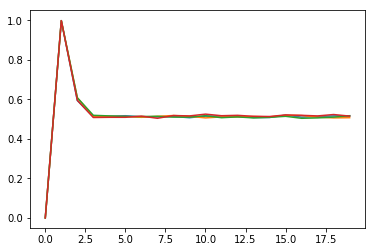

In [25]:
plt.ylim(top=1.05)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=-0.05)
for rIndex in range(0, len(R)):
    plt.plot(sizeOfGInEachDay[rIndex]) # plotting by columns
plt.show()

# 5- plotting resualt

In [26]:
import networkx as nx
G = nx.Graph()

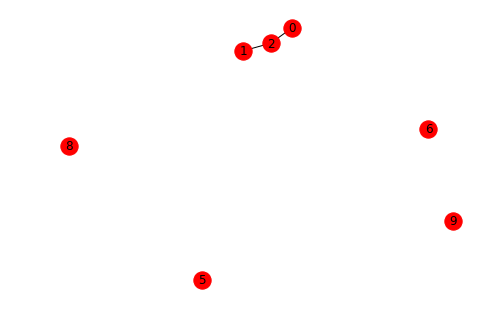

In [27]:
G = nx.Graph()
G.add_nodes_from([9,2,9,8,9,0,6,5,5])
G.add_edges_from([(1,2),(0,2)])
nx.draw(G, with_labels=True) 
plt.show(nx)

In [28]:
G

In [29]:
gggggg=[1,8,9,4,6,7,9,0,2,3,4]

In [30]:
g2g3=list(np.argsort(gggggg))

In [31]:
g2g3

[7, 0, 8, 9, 3, 10, 4, 5, 1, 2, 6]

In [32]:
def fff(B):
    B=[4,9,8,7,3]
    B=list(filter(lambda a: a != 8, B))
    return [B,B]
h=[7,8,2]
fff(h)
h=fff(h)
print(h[0])

[4, 9, 7, 3]


In [33]:
h[0]

[4, 9, 7, 3]